<img src="EDA_notebook_banner.png" style="width:100%">

<strong>Google, Microsoft, Amazon and other tech companies have laid off more than 70,000 employees in the last year
The job cuts in tech land are piling up, as companies that led the 10-year bull market adapt to a new reality.<br><br>
Google announced plans to lay off 12,000 people from its workforce Friday, while Microsoft said Wednesday that it’s letting go of 10,000 employees. Amazon also began a fresh round of job cuts that are expected to eliminate more than 18,000 employees and become the largest workforce reduction in the e-retailer’s 28-year history.
The layoffs come in a period of slowing growth, higher interest rates to battle inflation, and fears of a possible recession next year.</strong><br><br>

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">1. Import necessary Libaries</h2>

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("rainbow", 8)

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">2. Read the Dataset</h2>

In [13]:
df = pd.read_csv("layoffs_data.csv")
df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Swiggy,Bengaluru,Food,600.000000,0.100000,2023-01-19 00:00:00,https://timesofindia.indiatimes.com/business/india-business/swiggy-likely-to-lay-off-up-to-10-of-employees-after-performance-review/articleshow/97140856.cms,3600.000000,Unknown,2023-01-20 01:19:50,India,Unknown
1,WeWork,New York City,Real Estate,300.000000,nan,2023-01-19 00:00:00,https://investors.wework.com/news-and-events/press-releases/financial-releases-details/2023/WeWork-Announces-Date-of-Fourth-Quarter-and-Full-Year-2022-Results-Conference-Call/default.aspx,22200.000000,IPO,2023-01-19 17:03:45,United States,Unknown
2,Hubilo,SF Bay Area,Other,115.000000,0.350000,2023-01-19 00:00:00,https://inc42.com/buzz/hubilo-fires-35-of-its-workforce-in-second-round-of-layoffs-within-6-months/,153.000000,Series B,2023-01-20 01:03:30,United States,Unknown
3,Riot Games,Los Angeles,Consumer,46.000000,nan,2023-01-19 00:00:00,https://www.eurogamer.net/riot-games-reportedly-making-layoffs,21.000000,Acquired,2023-01-20 01:06:09,United States,Unknown
4,Fandom,SF Bay Area,Media,nan,nan,2023-01-19 00:00:00,https://variety.com/2023/digital/news/fandom-layoffs-giant-bomb-gamespot-metacritic-tv-guide-1235495258/,145.000000,Series E,2023-01-20 01:21:46,United States,Unknown


<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">2.1 Dataset Description</h3>

1. Company - Name of the Company
2. Location - Location of the Company
3. Industry - Type of Industry the company is
4. Laid_Off_Count - Total count
5. Percentage - Percentage of layoff
6. Date - Date of layoff
7. Source - Data gathered from source
8. Funds_Raised - Total funds raised
9. Stage - Stage of the company
10. Date_Added - data added in database
11. Country - Country of company located
12. List_of_Employees_Laid_Off - link to g_docs of employee list

In [40]:
df.shape

(2022, 12)

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">3. Data Exploration</h2>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2022 non-null   object 
 1   Location                    2022 non-null   object 
 2   Industry                    2022 non-null   object 
 3   Laid_Off_Count              1399 non-null   float64
 4   Percentage                  1365 non-null   float64
 5   Date                        2022 non-null   object 
 6   Source                      2022 non-null   object 
 7   Funds_Raised                1869 non-null   float64
 8   Stage                       2022 non-null   object 
 9   Date_Added                  2022 non-null   object 
 10  Country                     2022 non-null   object 
 11  List_of_Employees_Laid_Off  2022 non-null   object 
dtypes: float64(3), object(9)
memory usage: 189.7+ KB


In [42]:
df.isna().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                623
Percentage                    657
Date                            0
Source                          0
Funds_Raised                  153
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      0
dtype: int64

In [43]:
df.shape

(2022, 12)

In [44]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1399.000000,1365.000000,1869.000000
mean,208.428163,0.266233,838.237718
std,664.316923,0.259036,5962.834194
min,3.000000,0.000000,0.000000
25%,35.000000,0.100000,47.000000
50%,73.000000,0.180000,149.000000
75%,154.500000,0.300000,410.000000
max,11000.000000,1.000000,121900.000000


<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">4. Feature Engineering</h2>

Now, lets create a new column named 'year_of_laidoff' which will tell us on which layoff happend

In [45]:
def get_date():
    year_list = []
    
    col = df['Date']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [46]:
df['year_of_laidOff'] = layoff_year_list

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">5. Data Cleaning</h2>

<br>
Lets, with some cleanup...<br>
We don't need the Source(data gathered from source), Date_Added(data added in database), and List_of_Employees_Laid_Off - link to g_docs of employee list

In [47]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

<br>Drop the rows which Layoff count NAN, we don't need those rows

In [49]:
df = df[df['Laid_Off_Count'].notna()]

In [50]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff
0,Swiggy,Bengaluru,Food,600.0,0.10,2023-01-19 00:00:00,3600.0,Unknown,India,2023
1,WeWork,New York City,Real Estate,300.0,NaN,2023-01-19 00:00:00,22200.0,IPO,United States,2023
2,Hubilo,SF Bay Area,Other,115.0,0.35,2023-01-19 00:00:00,153.0,Series B,United States,2023
3,Riot Games,Los Angeles,Consumer,46.0,NaN,2023-01-19 00:00:00,21.0,Acquired,United States,2023
10,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18 00:00:00,1.0,IPO,United States,2023


<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6. Data Analytics</h2>

<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.1. Visualize the number Layoffs in these Years</h3>

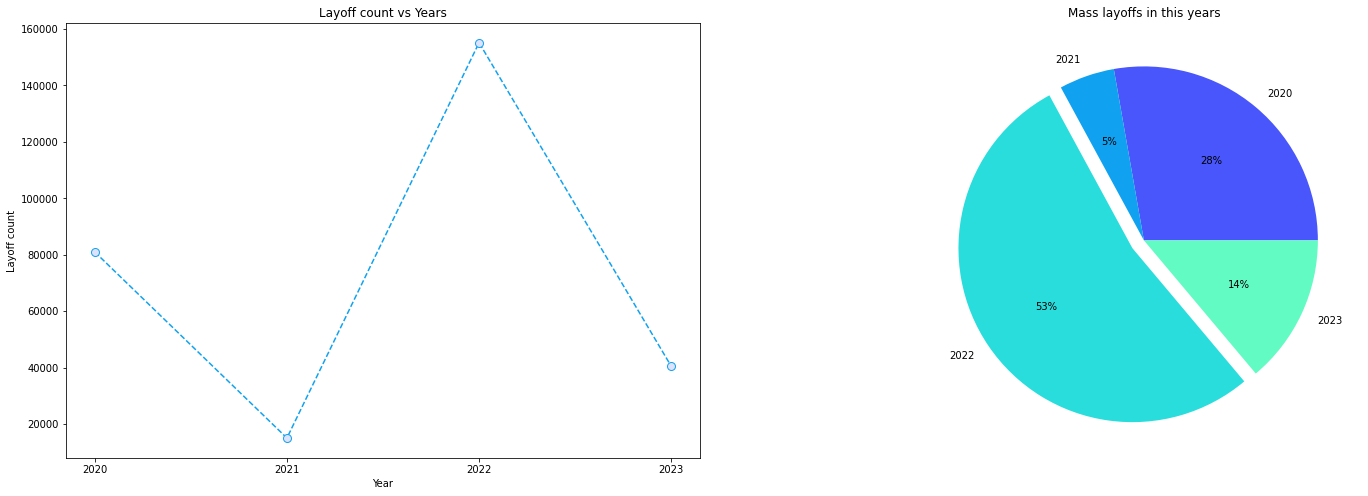

In [242]:
plt.figure(figsize=(25, 8))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0], colors=palette)
plt.title("Mass layoffs in this years")

plt.show()

<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.2. Get the insights of the layoffs groupby to their Continents</h3>

In [52]:
laidOff_countByCountry = df.groupby('Country', as_index=False).sum()

In [53]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [54]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

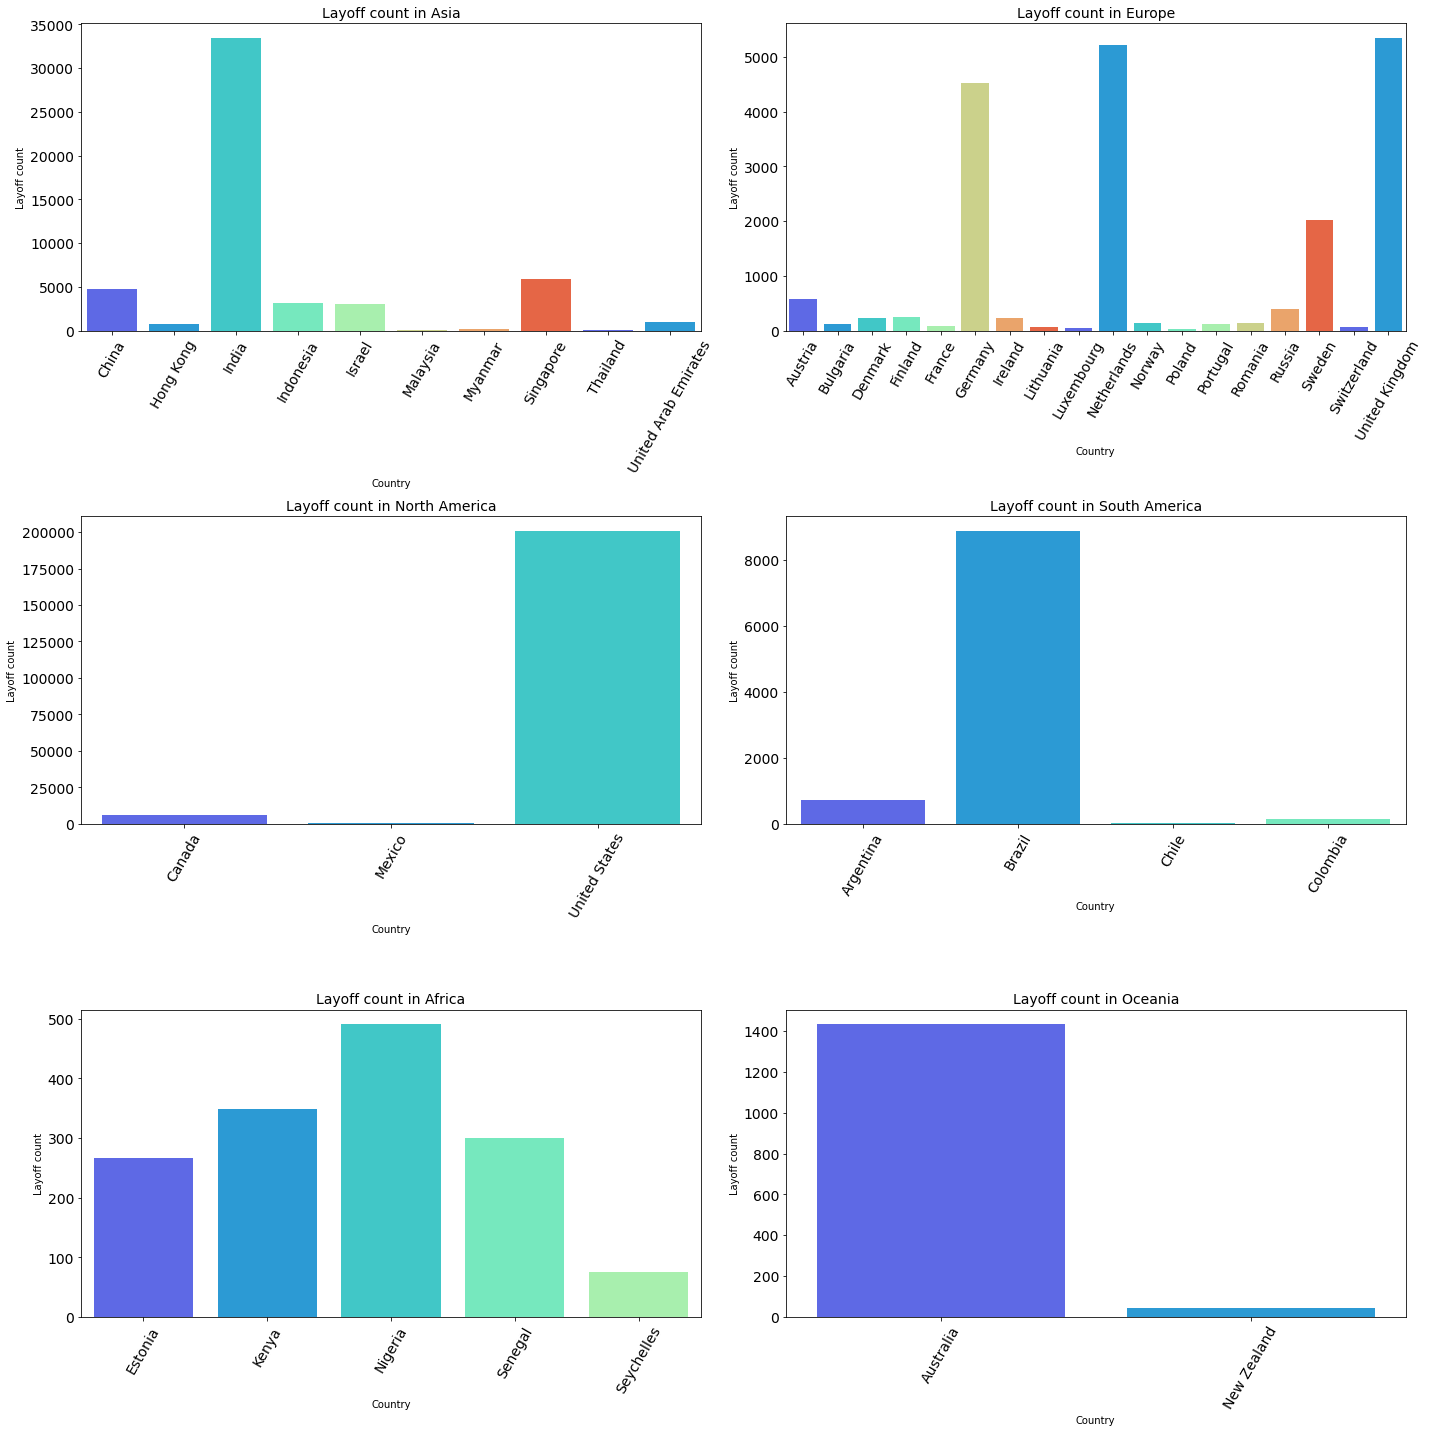

In [55]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

so, from the above visualization we can see that ***India, Germany, Netherlands, Sweden, United Kingdom, United States, Nigeria, and Australia*** are the countries to get most of the layoffs

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.3. Lets, visualize these countries</h2>

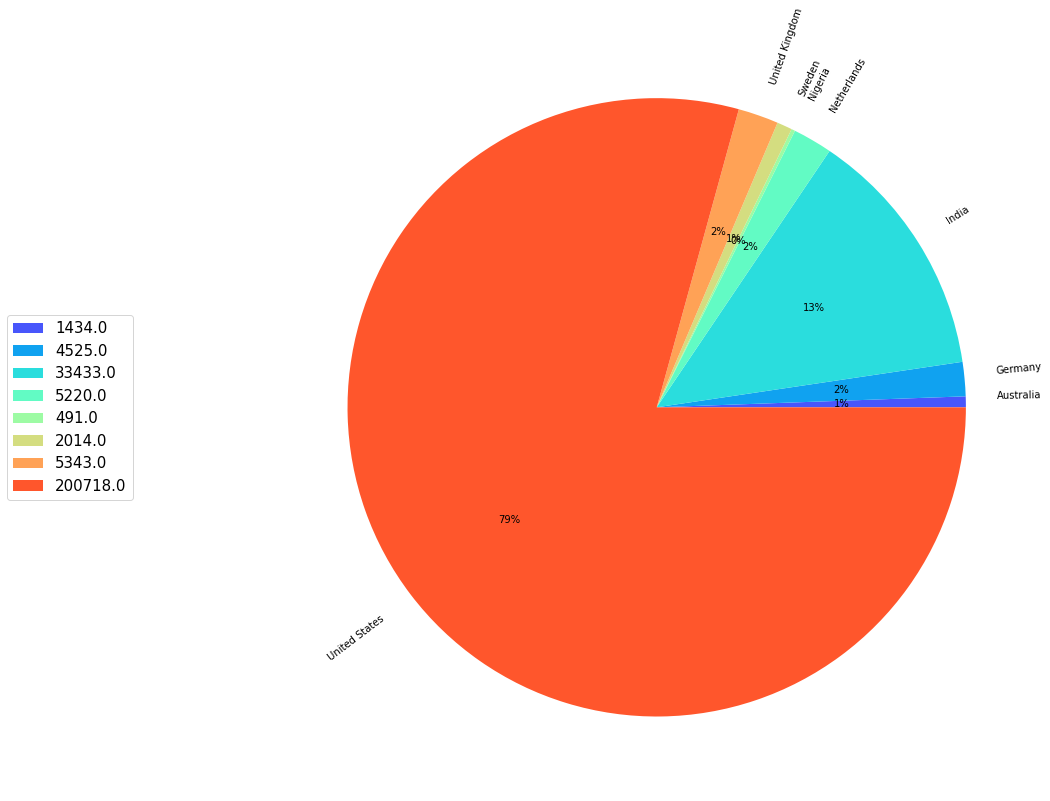

In [56]:
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Laid_Off_Count'], labels=mass_layoff_countries['Country'],
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Laid_Off_Count'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.4. Get the insights of the company with <strong>100% layoff rate</strong> </h2>

In [57]:
insight_1 = df.loc[df['Percentage'] == 1.00].dropna()
insight_1.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff
33,Britishvolt,London,Transportation,206.0,1.0,2023-01-17 00:00:00,2400.0,Unknown,United Kingdom,2023
378,Deliveroo Australia,Melbourne,Food,120.0,1.0,2022-11-15 00:00:00,1700.0,IPO,Australia,2022
461,Planetly,Berlin,Other,200.0,1.0,2022-11-04 00:00:00,5.0,Acquired,Germany,2022
506,Fifth Season,Pittsburgh,Food,100.0,1.0,2022-10-28 00:00:00,35.0,Series B,United States,2022
561,Playdots,New York City,Consumer,65.0,1.0,2022-10-13 00:00:00,10.0,Acquired,United States,2022


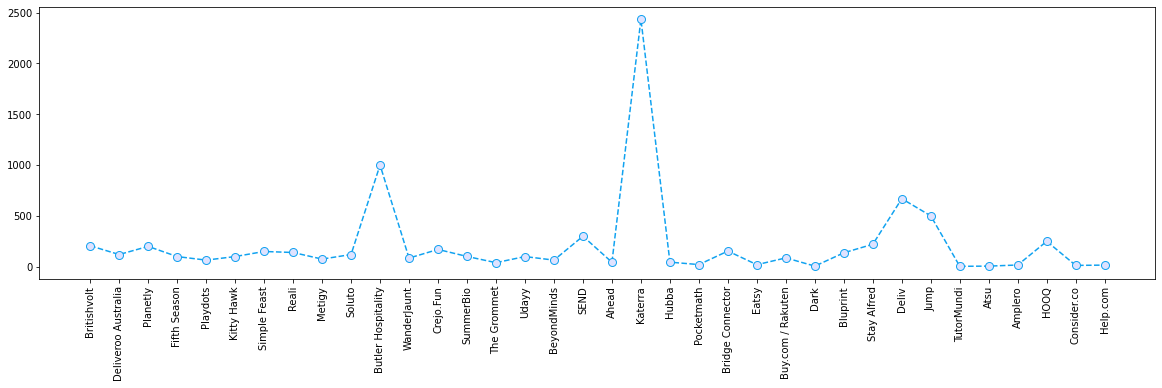

In [58]:
plt.figure(figsize=(25,5))

plt.plot(insight_1['Company'], insight_1['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)

plt.show()

<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.5. Divide the dataframe into <strong>4 Groups</strong></h3>
So, we can divide the data into <strong>4 groups</strong> according to their <strong>Layoff count</strong> from 3-35, 35-73, 73-154, and 154-11000

In [248]:
grp1_insight = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2_insight = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 73)]
grp3_insight = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 153)]
grp4_insight = df.loc[(df['Laid_Off_Count'] > 153)]

<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.5.1 Visualize the different types of Industries in the Group 4</h4>

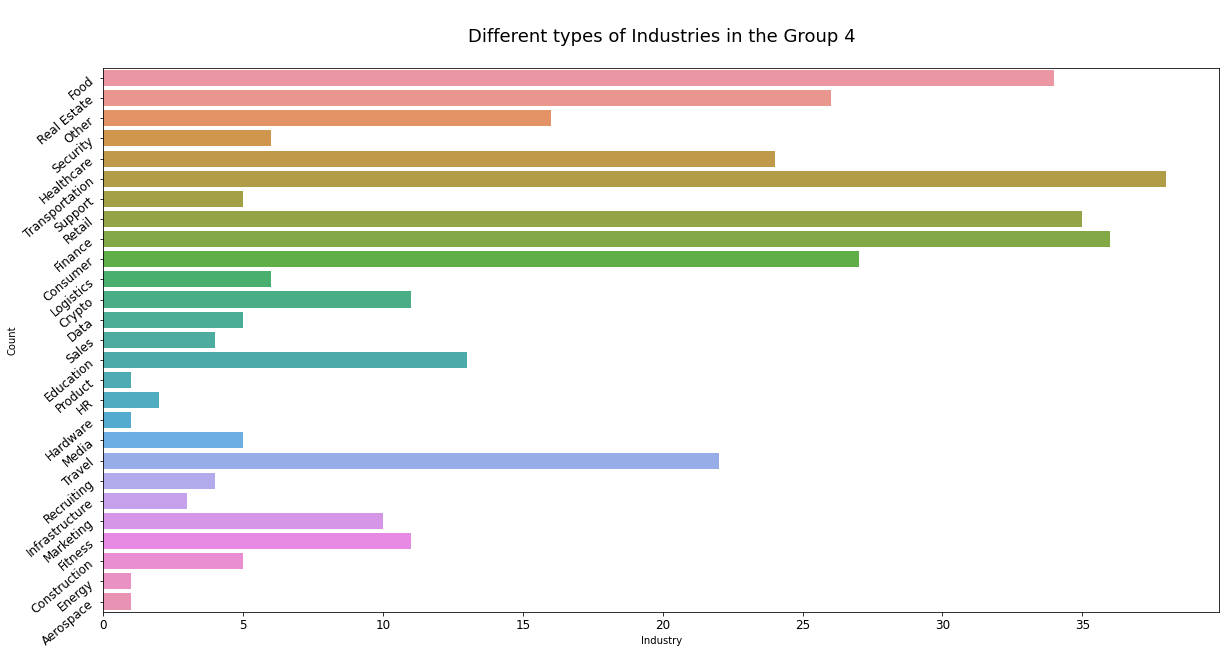

In [189]:
plt.figure(figsize=(20,10))

sns.countplot(y='Industry', data=grp4_insight)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n", fontsize=18)

plt.show()

<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.5.2 Lets, see the <strong>Top 10</strong> companies with the most layoffs in the group 4 (154-11000 layoff count)</h4>

In [209]:
top10_comp = grp4_insight.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,year_of_laidOff
428,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09 00:00:00,26000.0,IPO,United States,2022
10,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18 00:00:00,1.0,IPO,United States,2023
360,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16 00:00:00,108.0,IPO,United States,2022
139,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04 00:00:00,108.0,IPO,United States,2023
140,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04 00:00:00,65.0,IPO,United States,2023
1446,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30 00:00:00,NaN,Acquired,Netherlands,2020
361,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16 00:00:00,2.0,IPO,United States,2022
1595,Uber,SF Bay Area,Transportation,3700.0,0.14,2020-05-06 00:00:00,24700.0,IPO,United States,2020
459,Twitter,SF Bay Area,Consumer,3700.0,0.50,2022-11-04 00:00:00,12900.0,IPO,United States,2022
1550,Uber,SF Bay Area,Transportation,3000.0,0.13,2020-05-18 00:00:00,24700.0,IPO,United States,2020


<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.5.2a Visualize the Top10 <strong>Layoff Count and Location</strong></h5>

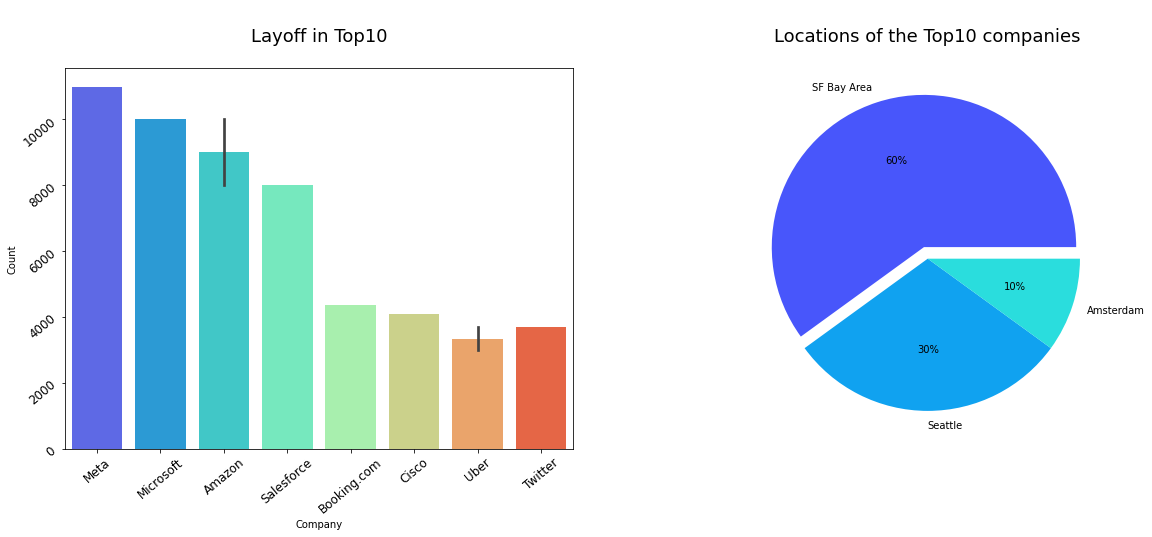

In [228]:
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location'].value_counts()
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%', explode = [0.08, 0, 0], colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()

<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.5.2b Visualize the Top10 Layoff Companies <strong>Funds Raised</strong></h5>

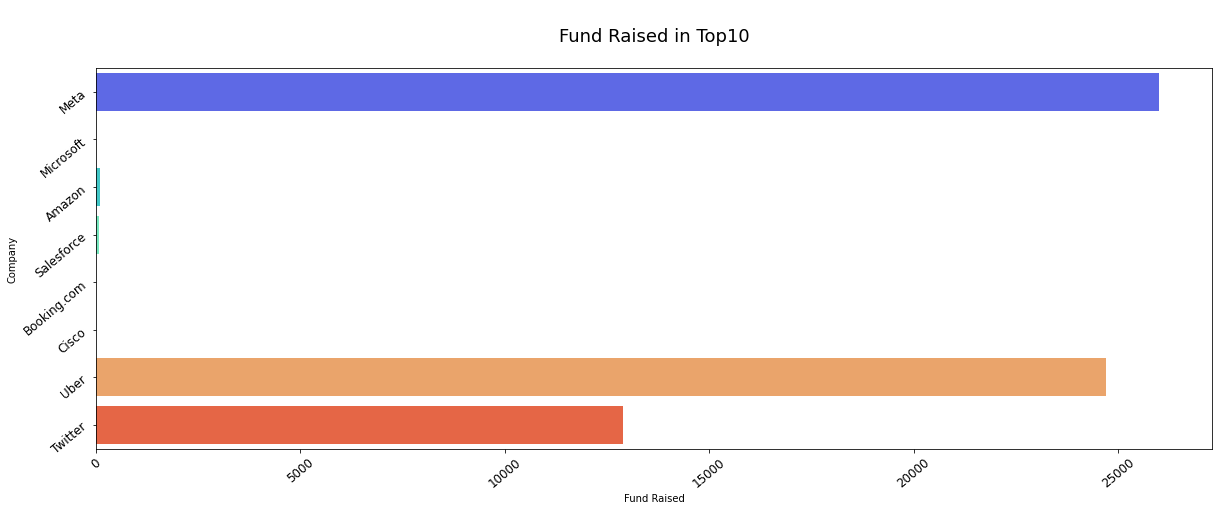

In [234]:
plt.figure(figsize=(20,7))

sns.barplot(data=top10_comp, y=top10_comp['Company'], x=top10_comp['Funds_Raised'], palette=palette)
plt.ylabel('Company'), plt.xlabel('Fund Raised')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nFund Raised in Top10\n", fontsize=18)

plt.show()

<br><br><br><div style="background:#4AD3FF; color:#000; padding: 20px; text-align:center">Thankyou! For viewing this Notebook, do upvote if you liked it... ☺️</div>